In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
a = [0,1,2,3,4,5,6,7,8,9,10]
print(a, np.quantile(a,.25))

a.reverse()

print(a, np.quantile(a,.25))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 2.5
[10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0] 2.5


In [31]:
b = np.repeat(np.arange(5), 5)
b

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4])

In [38]:
b = np.tile(np.arange(4), 4)
b
print(b, np.quantile(b,.25))

[0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3] 0.75


In [48]:
import os

print(os.getcwd())
df = pd.read_csv("data/Dateset_ODI.csv")
df.head()

/Users/neha/Development/git/MIT-DS/code/Foundations for Data Science -Week1


,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971"
1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972"
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972"
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972"
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973"


In [49]:
df.shape

(3932, 7)

In [50]:
df.tail()

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
3927,ODI # 3928,India,New Zealand,New Zealand,6 wickets,Mumbai,"Oct 22, 2017"
3928,ODI # 3929,South Africa,Bangladesh,South Africa,200 runs,East London,"Oct 22, 2017"
3929,ODI # 3930,Pakistan,Sri Lanka,Pakistan,9 wickets,Sharjah,"Oct 23, 2017"
3930,ODI # 3931,India,New Zealand,India,6 wickets,Pune,"Oct 25, 2017"
3931,ODI # 3932,India,New Zealand,India,6 runs,Kanpur,"Oct 29, 2017"


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3932 entries, 0 to 3931
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Scorecard   3932 non-null   object
 1   Team 1      3932 non-null   object
 2   Team 2      3932 non-null   object
 3   Winner      3932 non-null   object
 4   Margin      3753 non-null   object
 5   Ground      3932 non-null   object
 6   Match Date  3932 non-null   object
dtypes: object(7)
memory usage: 215.2+ KB


In [53]:
df.describe().T

,count,unique,top,freq
Scorecard,3932,3932,ODI # 1,1
Team 1,3932,24,Australia,583
Team 2,3932,25,Sri Lanka,508
Winner,3932,25,Australia,555
Margin,3753,227,6 wickets,347
Ground,3932,173,Sharjah,228
Match Date,3932,3386,"Feb 4, 2007",6


In [79]:
team1 = pd.DataFrame(df['Team 1'].value_counts())
team2 = pd.DataFrame(df['Team 2'].value_counts())

# print(team1, team2)

all_teams = pd.concat([team1, team2], axis=1)

all_teams.replace(np.nan, 0, inplace=True)
all_teams['total_games'] = all_teams['Team 1'] + all_teams['Team 2']
print(all_teams.count())


Team 1         26
Team 2         26
total_games    26
dtype: int64


In [83]:
pd.DataFrame(df['Ground'].value_counts())

,Ground
Sharjah,228
Dhaka,156
Sydney,154
Melbourne,147
Harare,136
...,...
Hove,1
Nairobi,1
Vijayawada,1
Kwekwe,1


In [86]:
a = np.array([1, 10, 2, 0])
np.power(a, 2)

array([  1, 100,   4,   0])

In [87]:
df[df['Scorecard'] == 'ODI # 50']

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
49,ODI # 50,England,Pakistan,England,132 runs,Manchester,"May 24-25, 1978"


In [90]:
df[df['Ground'] == 'Devonport']

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
429,ODI # 430,England,West Indies,England,29 runs,Devonport,"Feb 3, 1987"


In [91]:
df[df['Team 2'] == df['Winner']]

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972"
8,ODI # 9,England,West Indies,West Indies,8 wickets,The Oval,"Sep 7, 1973"
9,ODI # 10,New Zealand,Australia,Australia,7 wickets,Dunedin,"Mar 30, 1974"
10,ODI # 11,New Zealand,Australia,Australia,31 runs,Christchurch,"Mar 31, 1974"
13,ODI # 14,England,Pakistan,Pakistan,7 wickets,Nottingham,"Aug 31, 1974"
...,...,...,...,...,...,...,...
3907,ODI # 3908,Sri Lanka,India,India,168 runs,Colombo (RPS),"Aug 31, 2017"
3908,ODI # 3909,Sri Lanka,India,India,6 wickets,Colombo (RPS),"Sep 3, 2017"
3916,ODI # 3917,India,Australia,Australia,21 runs,Bengaluru,"Sep 28, 2017"
3919,ODI # 3920,P.N.G.,Scotland,Scotland,101 runs,Port Moresby,"Oct 6, 2017"


In [110]:
books = pd.read_csv("data/prog_book.csv")

In [93]:
books.head()

,Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price
0,4.17,3829,The Elements of Style,This style manual offers practical advice on i...,105,Hardcover,9.323529
1,4.01,1406,"The Information: A History, a Theory, a Flood","James Gleick, the author of the best sellers C...",527,Hardcover,11.000000
2,3.33,0,Responsive Web Design Overview For Beginners,In Responsive Web Design Overview For Beginner...,50,Kindle Edition,11.267647
3,3.97,1658,Ghost in the Wires: My Adventures as the World...,If they were a hall of fame or shame for compu...,393,Hardcover,12.873529
4,4.06,1325,How Google Works,Both Eric Schmidt and Jonathan Rosenberg came ...,305,Kindle Edition,13.164706


In [94]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rating           271 non-null    float64
 1   Reviews          271 non-null    int64  
 2   Book_title       271 non-null    object 
 3   Description      271 non-null    object 
 4   Number_Of_Pages  271 non-null    int64  
 5   Type             271 non-null    object 
 6   Price            271 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 14.9+ KB


In [96]:
books.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,271.0,4.067417,0.290749,3.000000,3.915000,4.100000,4.250000,5.00
Reviews,271.0,185.557196,552.122252,0.000000,5.500000,35.000000,116.500000,5938.00
Number_Of_Pages,271.0,475.077491,306.147492,50.000000,289.000000,384.000000,572.500000,3168.00
Price,271.0,54.541860,35.711485,9.323529,30.751471,46.317647,67.854412,235.65


In [103]:
books.sort_values(by=['Reviews'], ascending=False).head(10)

,Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price
6,4.09,5938,Start with Why: How Great Leaders Inspire Ever...,Why do you do what you do?\n\nWhy are some peo...,256,Hardcover,14.232353
0,4.17,3829,The Elements of Style,This style manual offers practical advice on i...,105,Hardcover,9.323529
45,4.27,2629,"The Phoenix Project: A Novel About IT, DevOps,...",Bill is an IT manager at Parts Unlimited. It's...,345,Hardcover,24.258824
90,4.05,2290,The Goal: A Process of Ongoing Improvement,"Written in a fast-paced thriller style, The Go...",384,Paperback,37.141176
8,3.87,2093,Weapons of Math Destruction: How Big Data Incr...,A former Wall Street quant sounds an alarm on ...,259,Hardcover,14.502941
19,4.10,2092,"The Innovators: How a Group of Hackers, Genius...",The computer and the internet are among the mo...,542,Hardcover,17.229412
7,4.15,1817,Algorithms to Live By: The Computer Science of...,A fascinating exploration of how insights from...,368,Hardcover,14.364706
3,3.97,1658,Ghost in the Wires: My Adventures as the World...,If they were a hall of fame or shame for compu...,393,Hardcover,12.873529
1,4.01,1406,"The Information: A History, a Theory, a Flood","James Gleick, the author of the best sellers C...",527,Hardcover,11.000000
4,4.06,1325,How Google Works,Both Eric Schmidt and Jonathan Rosenberg came ...,305,Kindle Edition,13.164706


In [105]:
books.sort_values(by=['Reviews', 'Rating'], ascending=False).head(10)

,Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price
6,4.09,5938,Start with Why: How Great Leaders Inspire Ever...,Why do you do what you do?\n\nWhy are some peo...,256,Hardcover,14.232353
0,4.17,3829,The Elements of Style,This style manual offers practical advice on i...,105,Hardcover,9.323529
45,4.27,2629,"The Phoenix Project: A Novel About IT, DevOps,...",Bill is an IT manager at Parts Unlimited. It's...,345,Hardcover,24.258824
90,4.05,2290,The Goal: A Process of Ongoing Improvement,"Written in a fast-paced thriller style, The Go...",384,Paperback,37.141176
8,3.87,2093,Weapons of Math Destruction: How Big Data Incr...,A former Wall Street quant sounds an alarm on ...,259,Hardcover,14.502941
19,4.10,2092,"The Innovators: How a Group of Hackers, Genius...",The computer and the internet are among the mo...,542,Hardcover,17.229412
7,4.15,1817,Algorithms to Live By: The Computer Science of...,A fascinating exploration of how insights from...,368,Hardcover,14.364706
3,3.97,1658,Ghost in the Wires: My Adventures as the World...,If they were a hall of fame or shame for compu...,393,Hardcover,12.873529
1,4.01,1406,"The Information: A History, a Theory, a Flood","James Gleick, the author of the best sellers C...",527,Hardcover,11.000000
4,4.06,1325,How Google Works,Both Eric Schmidt and Jonathan Rosenberg came ...,305,Kindle Edition,13.164706


In [106]:
books['Rating_rank'] = books['Rating'].rank(ascending=False, method = 'min')
books.sort_values(by='Rating_rank')

,Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price,Rating_rank
54,5.00,0,Your First App: Node.js,A tutorial for real-world application developm...,317,ebook,25.855882,1.0
269,4.77,4,"The Art of Computer Programming, Volumes 1-4a ...","""The bible of all fundamental algorithms and t...",3168,Hardcover,220.385294,2.0
131,4.72,362,Designing Data-Intensive Applications: The Big...,Want to know how the best software engineers a...,616,Paperback,45.561765,3.0
194,4.67,78,"Fluent Python: Clear, Concise, and Effective P...",Python's simplicity lets you become productive...,792,Paperback,64.091176,4.0
114,4.67,1,Build Web Applications with Java: Learn every ...,This book is primarily intended for beginners ...,372,Paperback,42.276471,4.0
...,...,...,...,...,...,...,...,...
86,3.22,2,Beginning Java 2,What is this book about? The Java language has...,1200,Paperback,36.617647,267.0
24,3.20,0,Game Programming Golden Rules,'Game Programming Golden Rules' provides indis...,318,Paperback,19.152941,268.0
187,3.00,0,"Lambda-Calculus, Combinators and Functional Pr...","Originally published in 1988, this book presen...",192,Paperback,61.167647,269.0
182,3.00,0,Cross-Platform Game Programming (Game Developm...,With many of today's games being released simu...,460,Paperback,60.391176,269.0


In [107]:
books.sort_values(by=['Reviews', 'Rating'], ascending=False).head(10)

,Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price,Rating_rank
6,4.09,5938,Start with Why: How Great Leaders Inspire Ever...,Why do you do what you do?\n\nWhy are some peo...,256,Hardcover,14.232353,139.0
0,4.17,3829,The Elements of Style,This style manual offers practical advice on i...,105,Hardcover,9.323529,101.0
45,4.27,2629,"The Phoenix Project: A Novel About IT, DevOps,...",Bill is an IT manager at Parts Unlimited. It's...,345,Hardcover,24.258824,60.0
90,4.05,2290,The Goal: A Process of Ongoing Improvement,"Written in a fast-paced thriller style, The Go...",384,Paperback,37.141176,152.0
8,3.87,2093,Weapons of Math Destruction: How Big Data Incr...,A former Wall Street quant sounds an alarm on ...,259,Hardcover,14.502941,212.0
19,4.10,2092,"The Innovators: How a Group of Hackers, Genius...",The computer and the internet are among the mo...,542,Hardcover,17.229412,135.0
7,4.15,1817,Algorithms to Live By: The Computer Science of...,A fascinating exploration of how insights from...,368,Hardcover,14.364706,107.0
3,3.97,1658,Ghost in the Wires: My Adventures as the World...,If they were a hall of fame or shame for compu...,393,Hardcover,12.873529,182.0
1,4.01,1406,"The Information: A History, a Theory, a Flood","James Gleick, the author of the best sellers C...",527,Hardcover,11.000000,169.0
4,4.06,1325,How Google Works,Both Eric Schmidt and Jonathan Rosenberg came ...,305,Kindle Edition,13.164706,148.0


In [112]:
books.sort_values(by=['Rating', 'Reviews'], ascending=[False,False]).head(10)

,Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price
54,5.00,0,Your First App: Node.js,A tutorial for real-world application developm...,317,ebook,25.855882
269,4.77,4,"The Art of Computer Programming, Volumes 1-4a ...","""The bible of all fundamental algorithms and t...",3168,Hardcover,220.385294
131,4.72,362,Designing Data-Intensive Applications: The Big...,Want to know how the best software engineers a...,616,Paperback,45.561765
194,4.67,78,"Fluent Python: Clear, Concise, and Effective P...",Python's simplicity lets you become productive...,792,Paperback,64.091176
114,4.67,1,Build Web Applications with Java: Learn every ...,This book is primarily intended for beginners ...,372,Paperback,42.276471
137,4.62,28,The Linux Programming Interface: A Linux and U...,The Linux Programming Interface is the definit...,1506,Hardcover,46.358824
9,4.62,0,ZX Spectrum Games Code Club: Twenty fun games ...,This book is ideal for ZX Spectrum fans and be...,128,Paperback,14.641176
198,4.58,58,CLR via C# (Developer Reference),Dig deep and master the intricacies of the com...,863,Paperback,66.320588
146,4.54,171,Practical Object Oriented Design in Ruby,The Complete Guide to Writing More Maintainabl...,247,Paperback,50.094118
103,4.54,52,The Elements of Computing Systems: Building a ...,This book is based on an abstraction-implement...,325,Hardcover,41.252941


In [109]:
books.head(10)

,Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price,Rating_rank
6,4.09,5938,Start with Why: How Great Leaders Inspire Ever...,Why do you do what you do?\n\nWhy are some peo...,256,Hardcover,14.232353,139.0
0,4.17,3829,The Elements of Style,This style manual offers practical advice on i...,105,Hardcover,9.323529,101.0
45,4.27,2629,"The Phoenix Project: A Novel About IT, DevOps,...",Bill is an IT manager at Parts Unlimited. It's...,345,Hardcover,24.258824,60.0
90,4.05,2290,The Goal: A Process of Ongoing Improvement,"Written in a fast-paced thriller style, The Go...",384,Paperback,37.141176,152.0
8,3.87,2093,Weapons of Math Destruction: How Big Data Incr...,A former Wall Street quant sounds an alarm on ...,259,Hardcover,14.502941,212.0
19,4.10,2092,"The Innovators: How a Group of Hackers, Genius...",The computer and the internet are among the mo...,542,Hardcover,17.229412,135.0
7,4.15,1817,Algorithms to Live By: The Computer Science of...,A fascinating exploration of how insights from...,368,Hardcover,14.364706,107.0
3,3.97,1658,Ghost in the Wires: My Adventures as the World...,If they were a hall of fame or shame for compu...,393,Hardcover,12.873529,182.0
1,4.01,1406,"The Information: A History, a Theory, a Flood","James Gleick, the author of the best sellers C...",527,Hardcover,11.000000,169.0
4,4.06,1325,How Google Works,Both Eric Schmidt and Jonathan Rosenberg came ...,305,Kindle Edition,13.164706,148.0


In [113]:
import seaborn as sns

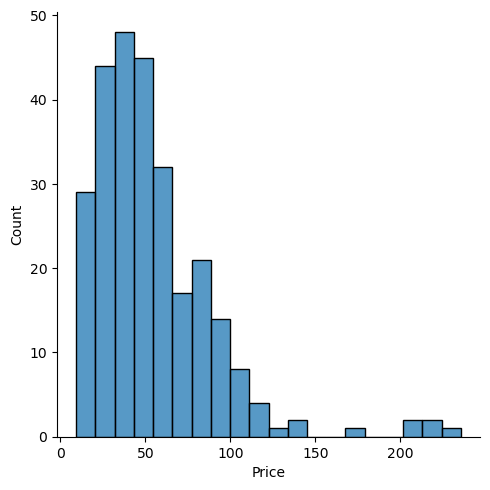

In [115]:
sns.displot(books['Price'])

<Axes: xlabel='Type', ylabel='count'>

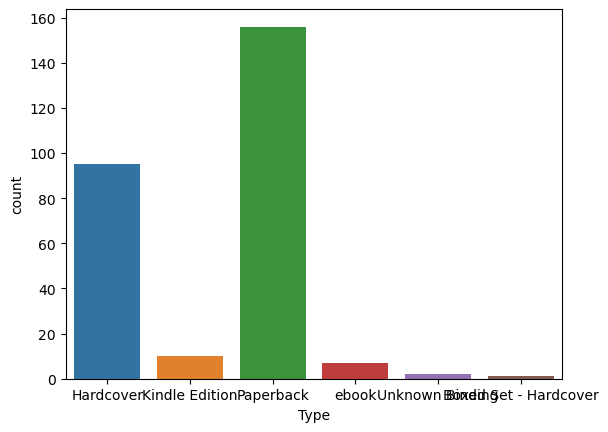

In [116]:
sns.countplot(books, x='Type')

In [117]:
books['Type'].value_counts()

Paperback                156
Hardcover                 95
Kindle Edition            10
ebook                      7
Unknown Binding            2
Boxed Set - Hardcover      1
Name: Type, dtype: int64

<Axes: xlabel='Type', ylabel='Rating'>

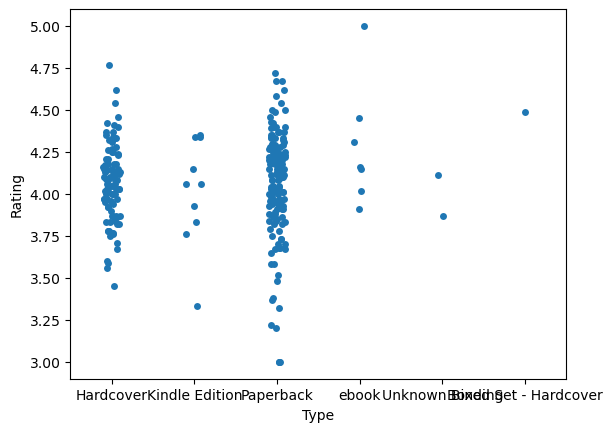

In [118]:
sns.stripplot(books, x='Type', y='Rating')

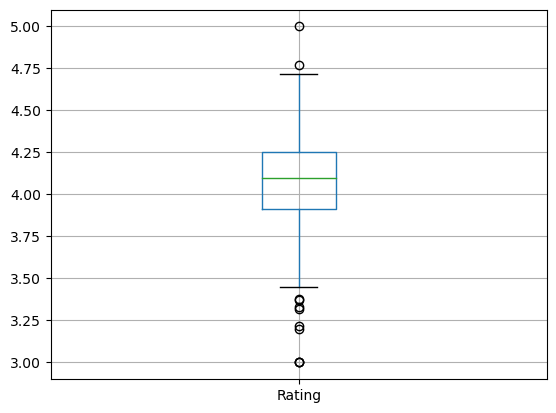

In [120]:
books.boxplot(column='Rating')
plt.show()

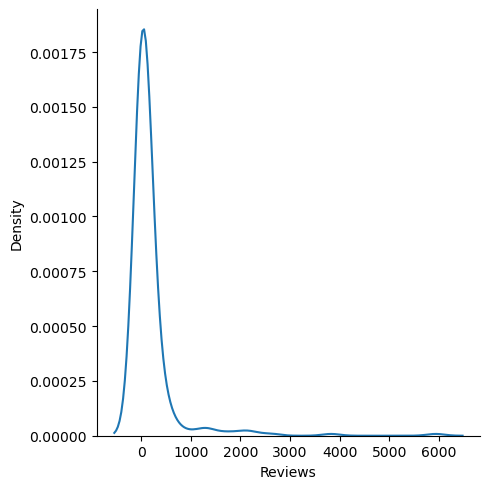

In [121]:
sns.displot(books['Reviews'], kind='kde')